In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset_dividido_folder = 'brain_tumor_dataset_dividido/'

treino_folder = 'treino/'
teste_folder = 'teste/'

dataset_dividido_folder_treino = dataset_dividido_folder + treino_folder
dataset_dividido_folder_teste = dataset_dividido_folder + teste_folder

#### Criar dois *ImageDataGenerator*, uma para treino, outro para teste. Apenas é executada *data augmentation* nos dados de treino. Nestes, são realizadas transformações verticais e horizontais nas imagens. Realizamos também um *rescale* para normalizar os dados entre 0 e 1. Por fim, nos dados de treino, definimos 25% para validação.

In [3]:
datagen_treino = ImageDataGenerator(rescale = 1./255,
                                    vertical_flip=True,
                                    horizontal_flip=True,
                                    validation_split=0.25) #25% dos 75% iniciais, para validação

datagen_teste = ImageDataGenerator(rescale = 1./255)

#### Após termos os *ImageDataGenerators*, utilizamos o método *flow_from_directory* para especificar o diretório onde os dados estão contidos. Definimos um *target_size* para as imagens (ficando assim, todas com as mesmas dimensões). Definimos o *color_mode* como *grayscale* de modo a ficarmos apenas com 1 canal de cor (o que não acontecia com o parâmetro *default* que retornava as imagens com 3 canais de cor. Definimos o *batch_size*, o tipo de classe que, neste problema, é binário, e por fim, definimos uma *seed*.

In [4]:
seed = 123

dados_treino = datagen_treino.flow_from_directory(
    dataset_dividido_folder_treino,
    target_size = (150,150),
    color_mode = "grayscale",
    batch_size = 30,
    class_mode="binary",
    subset='training',
    seed = seed)

dados_validacao = datagen_treino.flow_from_directory(
    dataset_dividido_folder_treino,
    target_size = (150,150),
    color_mode = "grayscale",
    batch_size = 30,
    class_mode="binary",
    subset='validation',
    seed = seed)

dados_teste = datagen_teste.flow_from_directory(
    dataset_dividido_folder_teste,
    target_size = (150,150),
    color_mode = "grayscale",
    batch_size = 30,
    class_mode = 'binary')

print(dados_treino.class_indices)

Found 142 images belonging to 2 classes.
Found 47 images belonging to 2 classes.
Found 64 images belonging to 2 classes.
{'no': 0, 'yes': 1}


#### Para visualizar um exemplo de *data augmentation*, selecionamos a primeira imagem dos dados de treino e geramos três imagens a partir da mesma

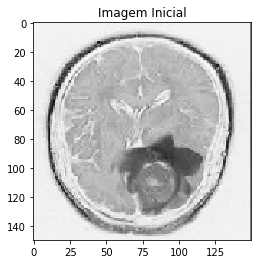

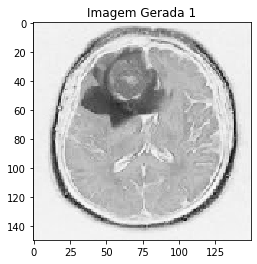

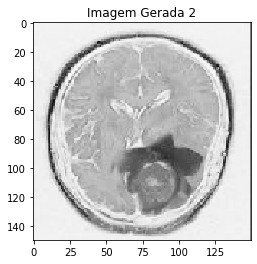

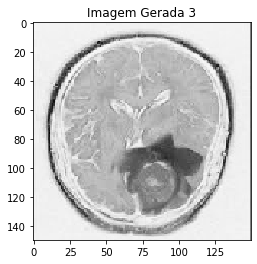

In [5]:
img = dados_treino.__getitem__(0)[0][1]
x = image.img_to_array(img)
plt.figure(0)
plt.imshow(np.squeeze(x, axis=2), cmap = "Greys")
plt.title('Imagem Inicial')
x = x.reshape((1,) + x.shape)
i = 1
for batch in datagen_treino.flow(x, batch_size=1):
    plt.figure(i)
    plt.title('Imagem Gerada ' + str(i))
    imgplot = plt.imshow(image.array_to_img(batch[0]), cmap = "Greys", interpolation = "nearest")
    i += 1
    if i % 4 == 0:
        break

plt.show()